# Pymaceuticals Inc.
---

### Analysis

- After reviewing the data you can see that Capomulin and Ramicane yield similar results to reduce the size of tumors in this group of mice. 
These 2 drugs preformed better based on the average tumor size being the smallest when using these drugs. 
The size of the tumor is typically bigger in heavier mice. 
Propiva was the worst drug tested and should might not be the best use of our time to continue testing.
 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupedf = df[df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dupedf['Mouse ID'].unique()

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
dupedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID']!= 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_vol = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_tumor_vol = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_vol = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_vol = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_vol = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    
'Mean Tumor Volume': mean_tumor_vol,
'Median Tumor Volume': med_tumor_vol,
'Tumor Volume Variance':var_tumor_vol,
'Tumor Volume Std. Dev.':std_tumor_vol,
'Tumor Volume Std. Err.':sem_tumor_vol   
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

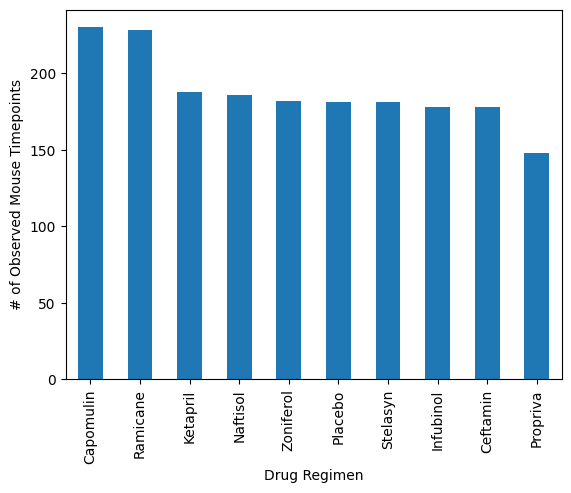

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = clean_df['Drug Regimen'].value_counts()
drug_count.plot(kind="bar",ylabel='# of Observed Mouse Timepoints')
plt.show()

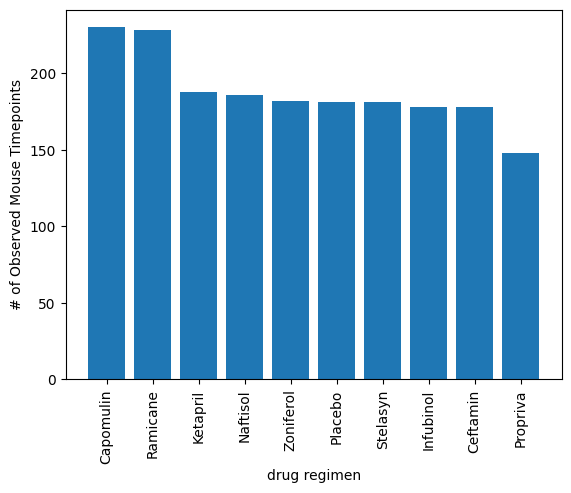

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=drug_count.index,height=drug_count.values)
plt.xlabel('drug regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)
plt.show()

In [46]:
drug_count = clean_df['Sex'].value_counts()
drug_count

Sex
Male      958
Female    922
Name: count, dtype: int64

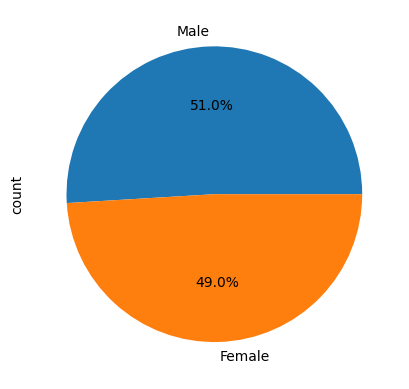

In [50]:
#Generate a pie plot showing the distribution of female versus male mice using Pandas
drug_count.plot(kind="pie",autopct="%1.1f%%")
plt.show()

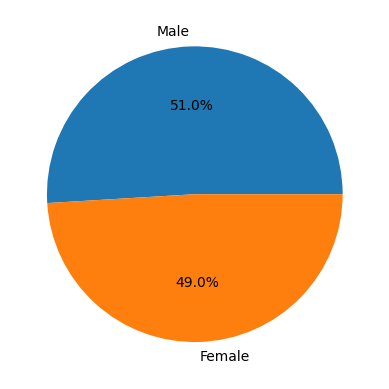

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(drug_count.values,labels=drug_count.index,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
q1 = clean_df.loc[clean_df['Drug Regimen']=='Capomulin' , 'Tumor Volume (mm3)'].quantile(0.25)
q3 = clean_df.loc[clean_df['Drug Regimen']=='Capomulin' , 'Tumor Volume (mm3)'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
outliers = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin') & ((clean_df['Tumor Volume (mm3)']<lower_bound) | (clean_df['Tumor Volume (mm3)']>upper_bound))]
outliers
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.merge(clean_df,last_timepoint,on=['Mouse ID','Timepoint'],how='inner')
last_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = []


# Create empty list to fill with tumor vol data (for plotting)
list1 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    q1 = last_timepoint_df.loc[last_timepoint_df['Drug Regimen']==treatment , 'Tumor Volume (mm3)'].quantile(0.25)
    q3 = last_timepoint_df.loc[last_timepoint_df['Drug Regimen']==treatment , 'Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = last_timepoint_df.loc[(last_timepoint_df['Drug Regimen']==treatment) & ((last_timepoint_df['Tumor Volume (mm3)']<lower_bound) | (last_timepoint_df['Tumor Volume (mm3)']>upper_bound))]
    list1.append(outliers)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol.append(last_timepoint_df.loc[last_timepoint_df['Drug Regimen']==treatment , 'Tumor Volume (mm3)'])

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    outliers = last_timepoint_df.loc[(last_timepoint_df['Drug Regimen']==treatment) & ((last_timepoint_df['Tumor Volume (mm3)']<lower_bound) | (last_timepoint_df['Tumor Volume (mm3)']>upper_bound))]
    print(f'Outliers for {treatment} are {outliers}')
    

Outliers for Capomulin are Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Outliers for Ramicane are Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []
Outliers for Infubinol are    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
74     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  
74           36.321346                 0  
Outliers for Ceftamin are Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


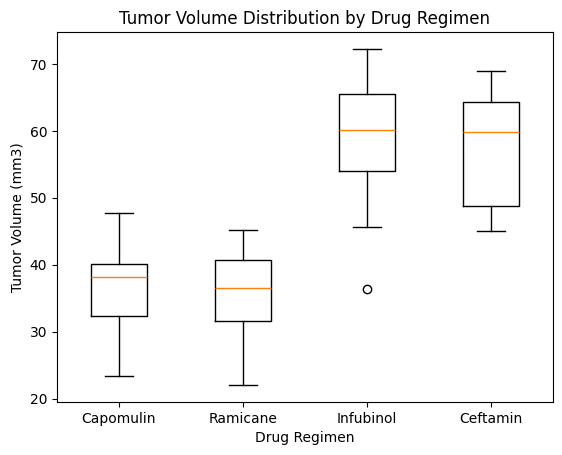

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol,labels=treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.show()

## Line and Scatter Plots

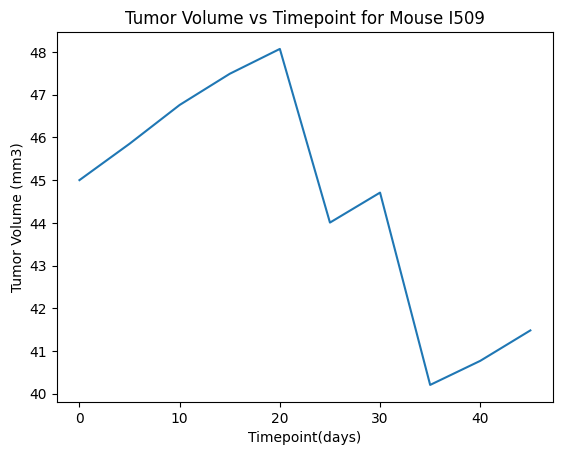

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
capomulin_df
capomulin_df.loc[capomulin_df['Mouse ID']=='l509']['Timepoint']
plt.plot(capomulin_df.loc[capomulin_df['Mouse ID']=='l509']['Timepoint'],capomulin_df.loc[capomulin_df['Mouse ID']=='l509']['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint for Mouse I509')
plt.show()


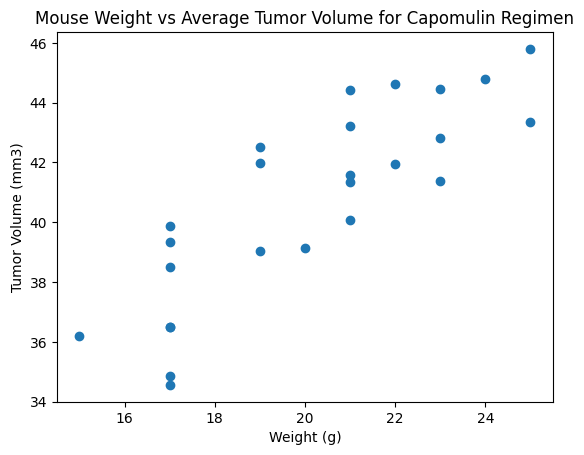

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean(),capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


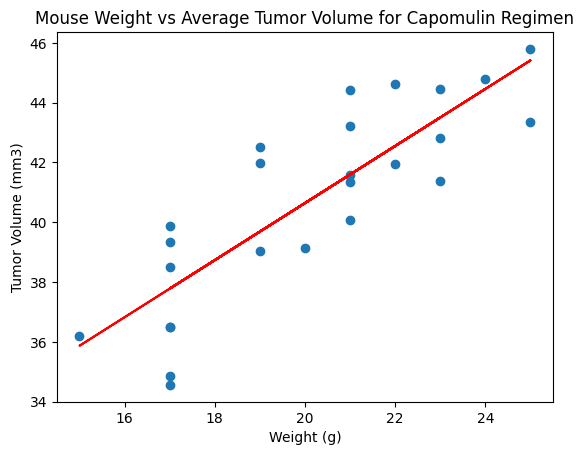

The linear regression model is y = 0.95x + 21.55
The r-squared value is 0.71


In [75]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean(),capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
print(f'The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean(),capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
regress_values = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean() * slope + intercept
plt.scatter(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean(),capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
plt.plot(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean(),regress_values,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.show()
print(f'The linear regression model is y = {round(slope,2)}x + {round(intercept,2)}')
print(f'The r-squared value is {round(rvalue**2,2)}')


